In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import DataLoader
from torchvision import utils as vutils
from torchvision import datasets, transforms

In [2]:
data_dir = "/home/pervinco/Datasets/cifar10_pytorch"

batch_size = 128

latent_dim = 100
input_dim = 3
g_dim = 64  # 생성자의 특성 맵 크기
d_dim = 64  # 판별자의 특성 맵 크기

num_workers = os.cpu_count()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
train_dataset = datasets.CIFAR10(root=data_dir, train=True, download=True, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


In [4]:
real_batch = next(iter(train_dataloader))

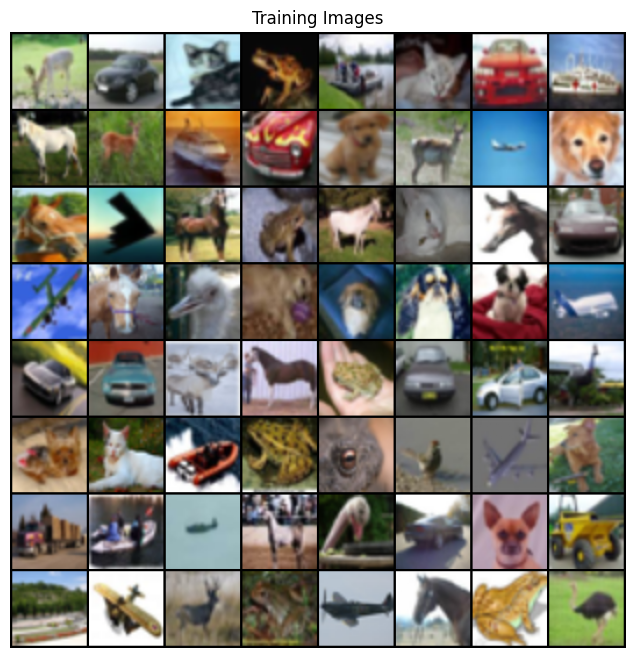

In [5]:
real_batch = next(iter(train_dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))